In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [12]:
df = pd.read_csv("machine_failure_data.csv")

print("Shape:", df.shape)
print("Columns:", list(df.columns))
##data.head()
data.info()

Shape: (10000, 8)
Columns: ['UDI', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Failure']
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  str    
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), str(1)
memory usage: 625.1 KB


In [13]:
df.head()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.1,323.740741,1551,42.8,0,0
1,2,L,298.2,324.111111,1408,46.3,3,0
2,3,L,298.1,323.370370,1498,49.4,5,0
3,4,L,298.2,323.740741,1433,39.5,7,0
4,5,L,298.2,324.111111,1408,40.0,9,0


In [14]:
if "UDI" in df.columns:
    data.drop(columns=["UDI"])

In [15]:
df.head()



,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.1,323.740741,1551,42.8,0,0
1,2,L,298.2,324.111111,1408,46.3,3,0
2,3,L,298.1,323.370370,1498,49.4,5,0
3,4,L,298.2,323.740741,1433,39.5,7,0
4,5,L,298.2,324.111111,1408,40.0,9,0


In [22]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()

df["Type"] = lab_en.fit_transform(df["Type"])


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(['Failure'],axis=1)
y = df['Failure']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)



In [27]:
print(X_train.shape,X_test.shape)

(7000, 7) (3000, 7)


In [28]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [29]:
from sklearn.metrics import classification_report

y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

print(classification_report(y_train,y_train_pred_dt))
print('\n')
print(classification_report(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6763
           1       1.00      1.00      1.00       237

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2898
           1       0.65      0.67      0.66       102

    accuracy                           0.98      3000
   macro avg       0.82      0.83      0.82      3000
weighted avg       0.98      0.98      0.98      3000



In [31]:
import numpy as np
feature_names = list(X_train)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

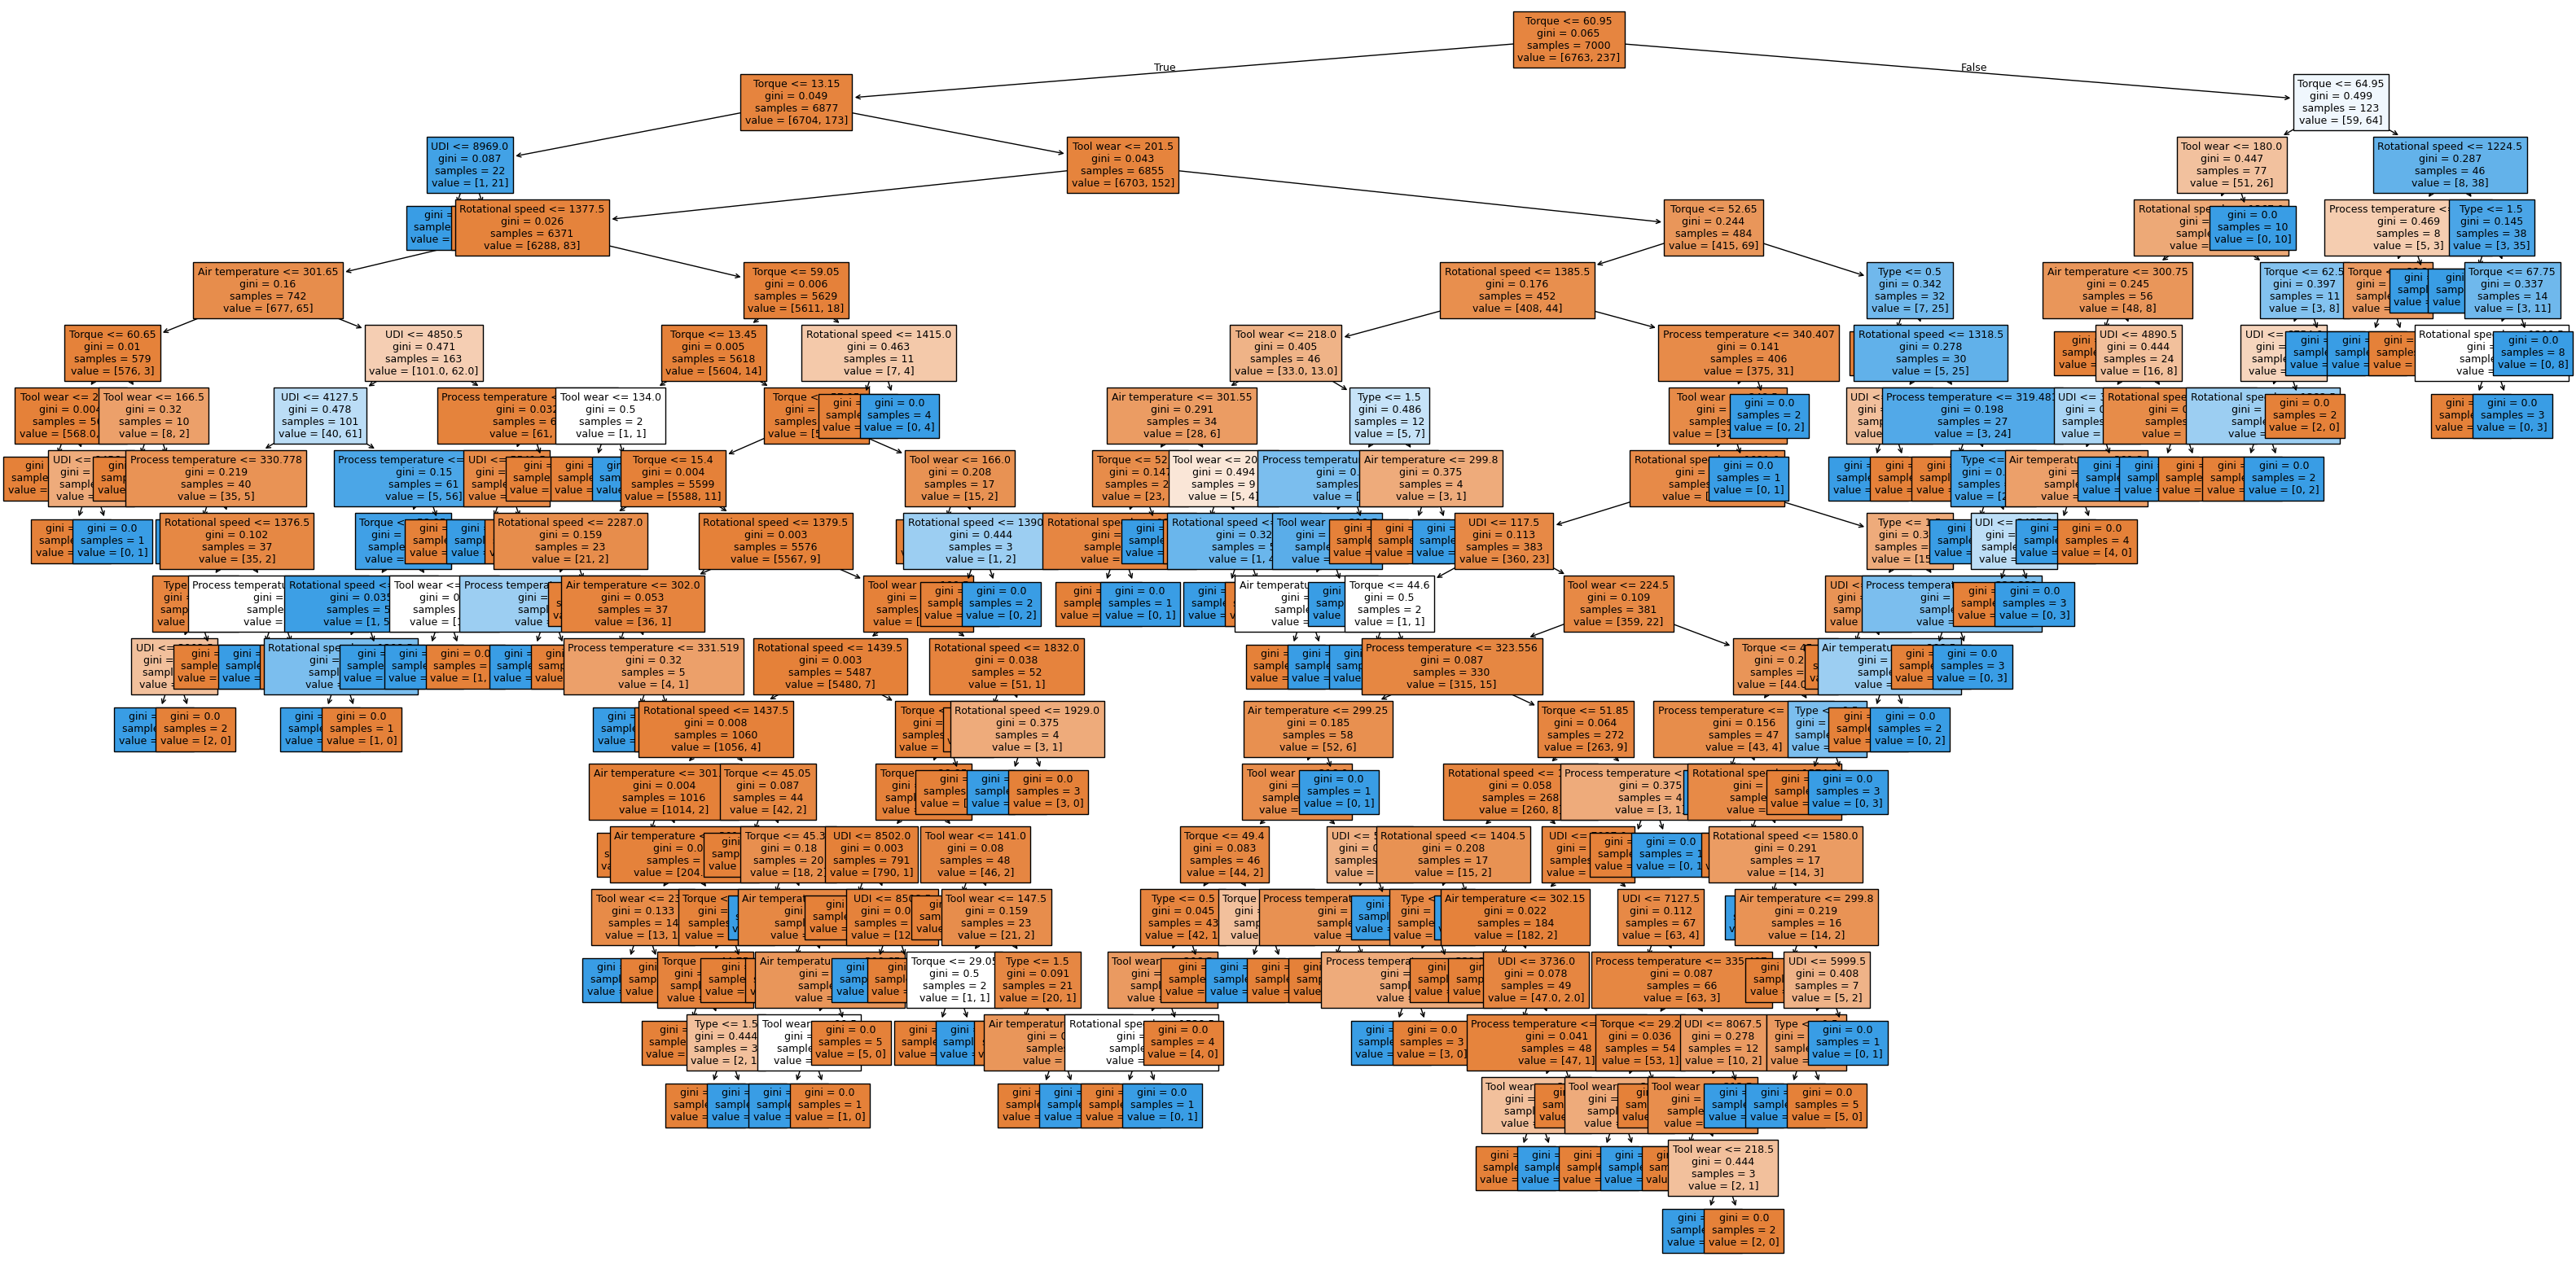

In [36]:
from sklearn import tree
plt.figure(figsize=(40,20))
out = tree.plot_tree(
    model_dt,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None

)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# hyperparameter tuning
max_depth_values = np.arange(2,7,2)
max_leaf_nodes_values = [50,100,200]
min_sample_split_values = [10,40,70]

best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_sample_split in min_sample_split_values:

            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_leaf= min_sample_split,
                class_weight='balanced',
                random_state=42
            )

            estimator.fit(X_train,y_train)
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            train_recall_score = recall_score(y_train,y_train_pred)
            test_recall_score = recall_score(y_test,y_test_pred)

            score_diff = abs(train_recall_score-test_recall_score)

            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff=score_diff
                best_test_score=test_recall_score
                best_estimator=estimator
print('Best Parameters')
print(f'Max depth: {best_estimator.max_depth}')
print(f'Max leaf nodes: {best_estimator.max_leaf_nodes}')
print(f'Max sample split: {best_estimator.min_samples_split}')

print(f'Best Test recall score: {best_test_score}')


Best Parameters
Max depth: 4
Max leaf nodes: 50
Max sample split: 2
Best Test recall score: 0.9411764705882353


In [41]:
model_dt_best = best_estimator
model_dt_best.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",np.int64(4)
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",70
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",50
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the c

In [44]:
y_train_pred_best = model_dt_best.predict(X_train)
y_test_pred_best = model_dt_best.predict(X_test)
print(classification_report(y_train,y_train_pred_best))
print(classification_report(y_test,y_test_pred_best))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      6763
           1       0.26      0.96      0.40       237

    accuracy                           0.90      7000
   macro avg       0.63      0.93      0.68      7000
weighted avg       0.97      0.90      0.93      7000

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2898
           1       0.24      0.94      0.38       102

    accuracy                           0.90      3000
   macro avg       0.62      0.92      0.66      3000
weighted avg       0.97      0.90      0.92      3000



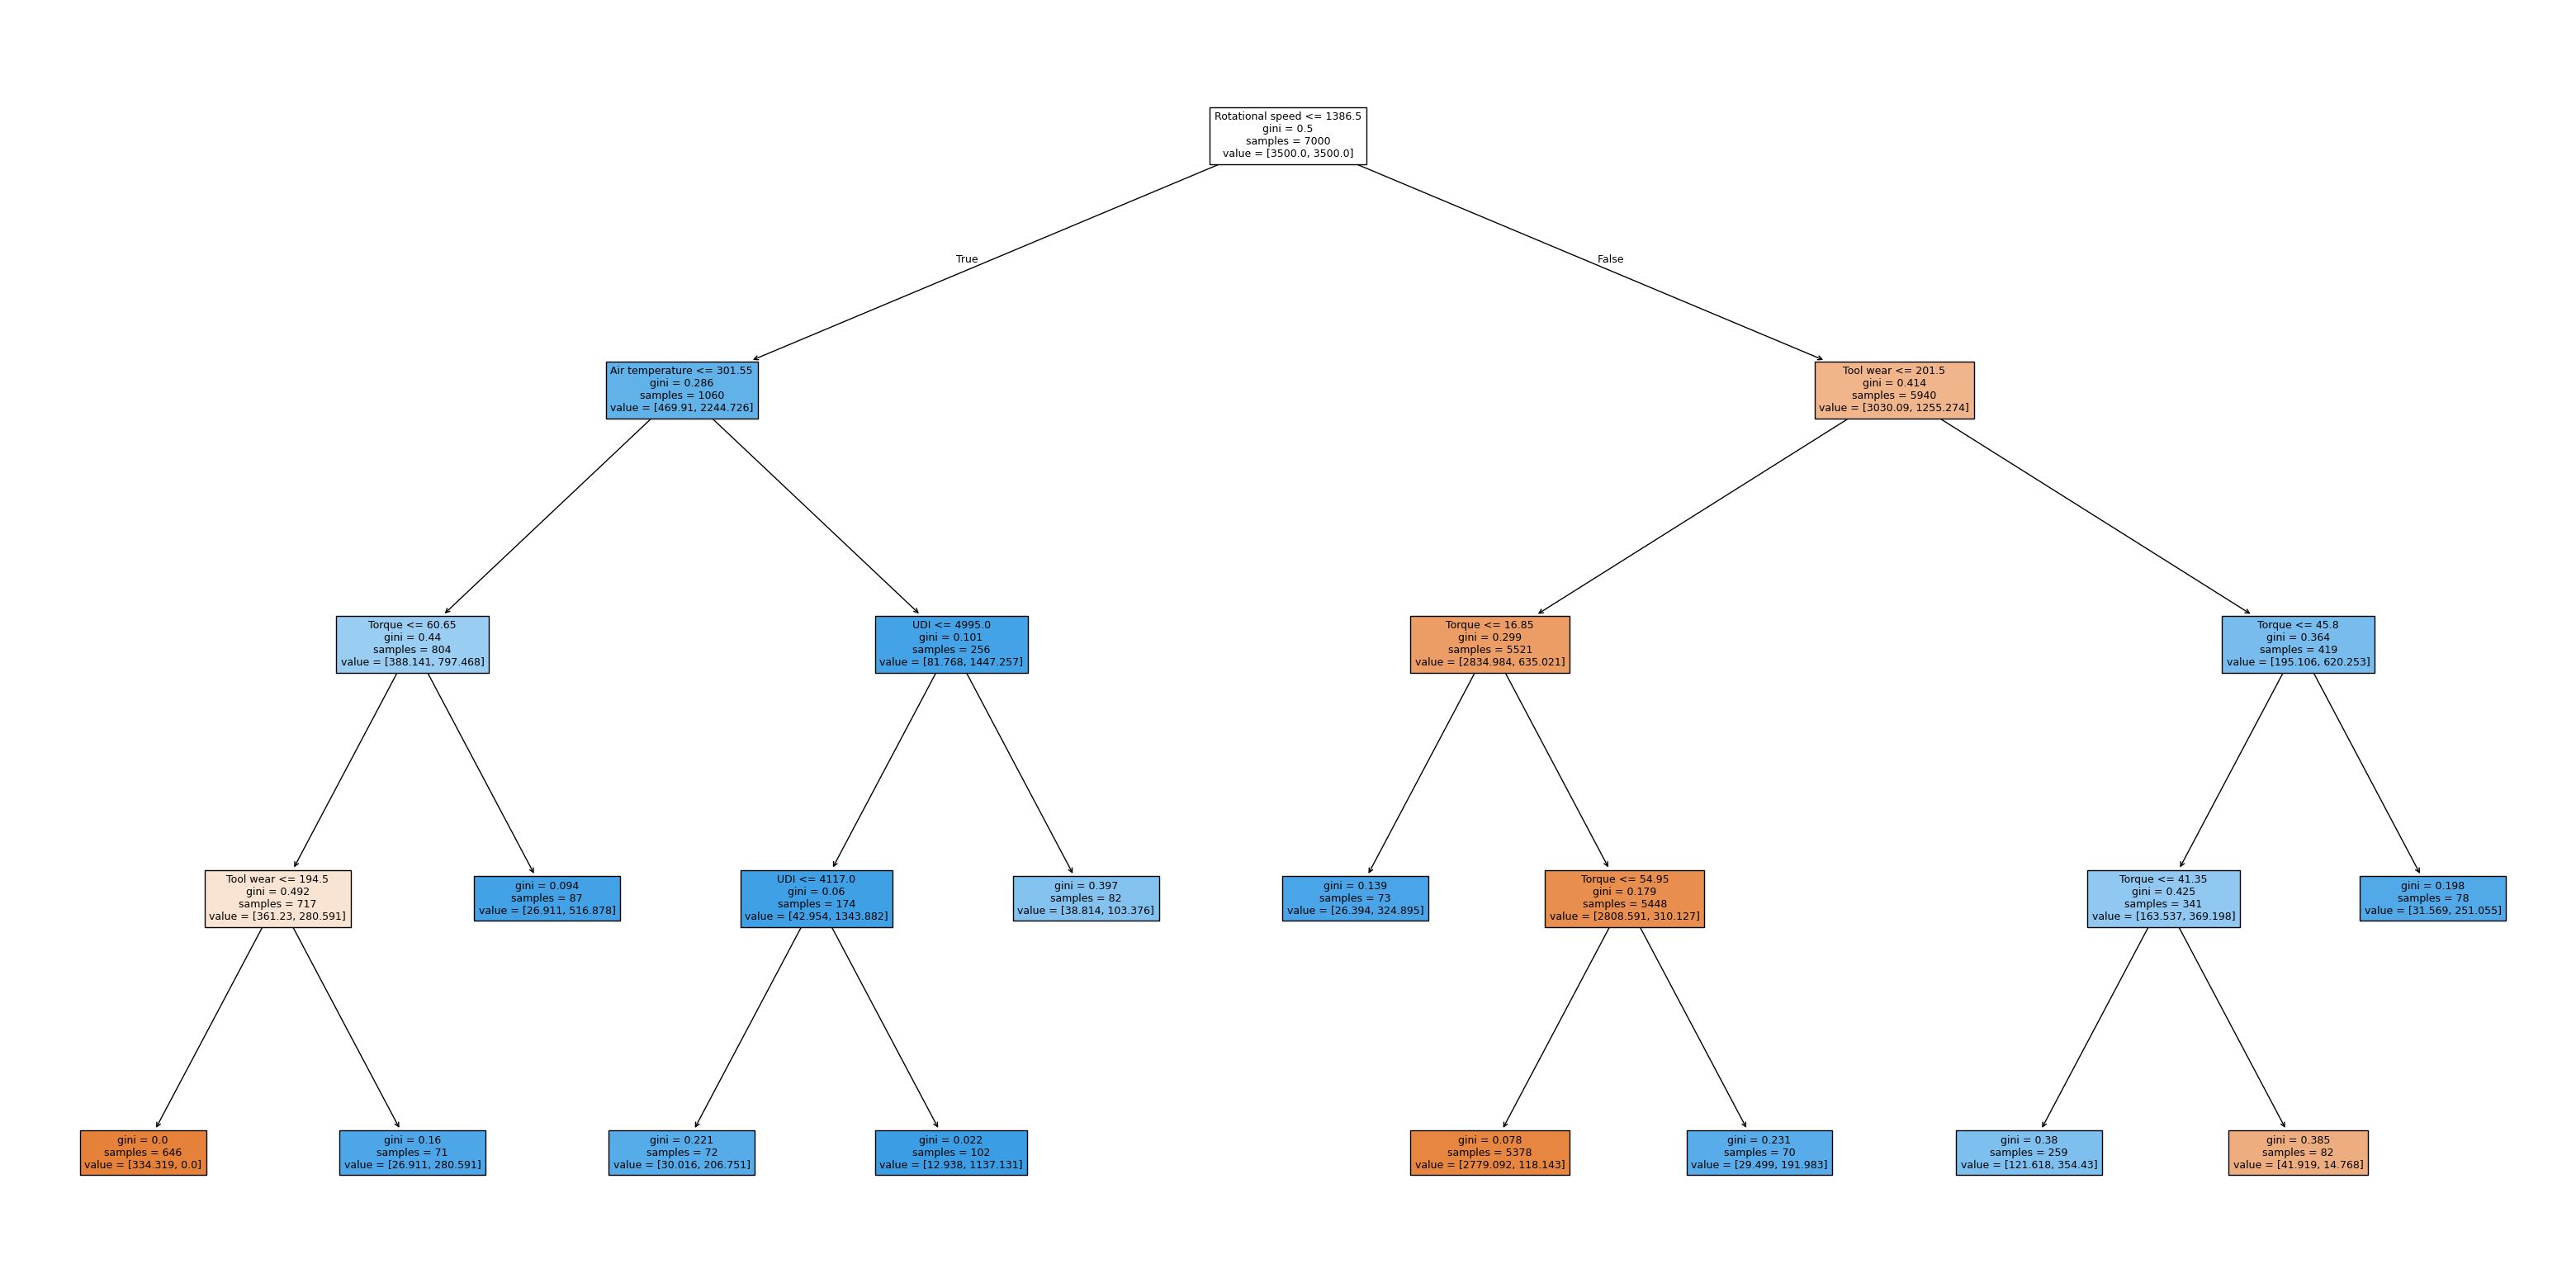

In [45]:
from sklearn import tree
plt.figure(figsize=(40,20))
out = tree.plot_tree(
    model_dt_best,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None

)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print(classification_report(y_train,y_train_pred_rf))
print(classification_report(y_test,y_test_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6763
           1       1.00      1.00      1.00       237

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2898
           1       0.90      0.60      0.72       102

    accuracy                           0.98      3000
   macro avg       0.94      0.80      0.85      3000
weighted avg       0.98      0.98      0.98      3000



In [54]:
pos_count = (y_train==1).sum()
neg_count = (y_train==0).sum()

scale_pos_weight = neg_count/pos_count if pos_count > 0 else 1.0


In [55]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators = 300,
    max_depth = 4,
    learning_rate = 0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    scale_pos_weight= scale_pos_weight,
    random_state= 42,
    n_jobs=-1
)

xgb_clf.fit(X_train,y_train)

y_train_pred_xgb=xgb_clf.predict(X_train)
y_test_pred_xgb =xgb_clf.predict(X_test)

print(classification_report(y_train,y_train_pred_xgb))
print(classification_report(y_test,y_test_pred_xgb))



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6763
           1       0.87      1.00      0.93       237

    accuracy                           0.99      7000
   macro avg       0.94      1.00      0.96      7000
weighted avg       1.00      0.99      1.00      7000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2898
           1       0.69      0.77      0.73       102

    accuracy                           0.98      3000
   macro avg       0.84      0.88      0.86      3000
weighted avg       0.98      0.98      0.98      3000



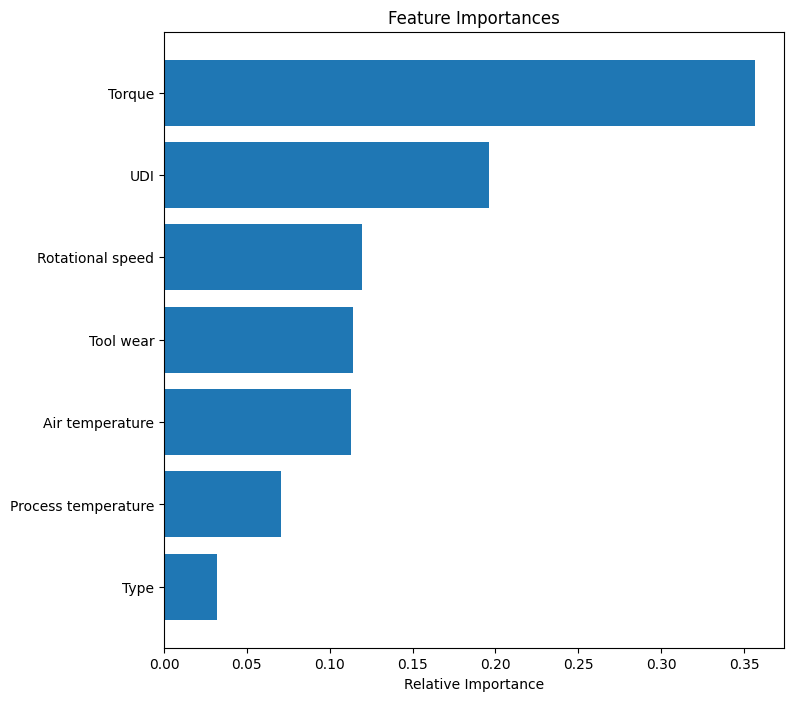

In [57]:
feature_importances = xgb_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_clf,X_train,y_train,cv=3)
print(scores)
print('\n')
print(scores.mean())

[0.9798629  0.97556794 0.97728247]


0.9775711011721224
